In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [124]:
import sys
import pickle
import seaborn as sns

sys.path.append('..')

In [125]:
from simulations.scenarios import *

In [89]:
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")
sns.set_palette('colorblind', n_colors=4)

In [143]:
parsed_logs_folder = 'Enron/parsing/'
social_graph = pickle.load(open(parsed_logs_folder + "social.pkl", "rb"))
log = pickle.load(open(parsed_logs_folder + "replay_log.pkl", "rb"))[:50000]

In [91]:
context = Context(log, social_graph)

In [8]:
def visualize_propagation(scenario_name, kp, hp=None):
    kp = kp[['Stale', 'Updated', 'Not updated']]
    
    kp.plot.area()
    plt.legend(frameon=True)
    plt.title("%s — Encryption keys propagation" % scenario_name)
    plt.xlabel("Emails sent")
    plt.ylabel("Link Key status")
    
    plt.savefig(scenario_name.lower().replace(' ', '_') + '_key_propagation.pdf')

    if hp is not None:
        hp = hp[['Stale', 'Updated', 'Not updated']]
        hp.plot.area()
        plt.legend(frameon=True)
        plt.title("%s — Head propagation" % scenario_name)
        plt.xlabel("Emails sent")
        plt.ylabel("Link Head status")

        plt.savefig(scenario_name.lower().replace(' ', '_') + '_head_propagation.pdf')

In [184]:
def visualize_encryption_status_history(scenario_name, es):
    dummies = pd.DataFrame(columns=['Stale key', 'Encrypted', 'Plaintext'])
    for i, item in enumerate(es):
        if item == EncStatus.stale:
            dummies.loc[i] = [1, 0, 0]
        elif item == EncStatus.encrypted:
            dummies.loc[i] = [0, 1, 0]
        elif item == EncStatus.plaintext:
            dummies.loc[i] = [0, 0, 1]
    
    cumdata = dummies.cumsum()
    cumdata.plot.area()
    plt.legend(frameon=True)
    plt.title("%s — Encryption status" % scenario_name)
    plt.xlabel("Emails sent")
    plt.ylabel("Emails sent")

In [158]:
with SimulationParams(key_update_every_nb_sent_emails=None).as_default():
    ac_hp, ac_es = simulate_autocrypt(context)

Simulating Autocrypt:
SimulationParams(mode='dummy', chain_update_buffer_size=None, key_update_every_nb_sent_emails=None)
Keys.   Updated: 467, Not updated: 1547, Stale: 0
Emails. Sent: 6222, Encrypted: 1293


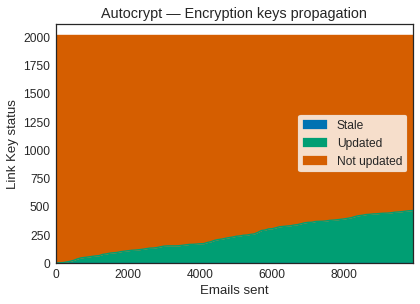

In [159]:
visualize_propagation('Autocrypt', ac_hp)
plt.show()

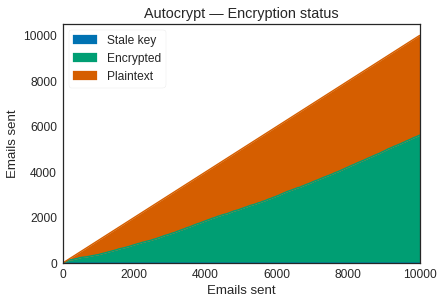

In [185]:
visualize_encryption_status_history('Autocrypt', ac_es)
plt.show()

In [147]:
with SimulationParams(key_update_every_nb_sent_emails=5).as_default():
    dyn_ac_hp, dyn_ac_es = simulate_autocrypt(context)

Simulating Autocrypt:
SimulationParams(mode='dummy', chain_update_buffer_size=None, key_update_every_nb_sent_emails=5)
Keys.   Updated: 415, Not updated: 1547, Stale: 52
Emails. Sent: 6222, Encrypted: 1293


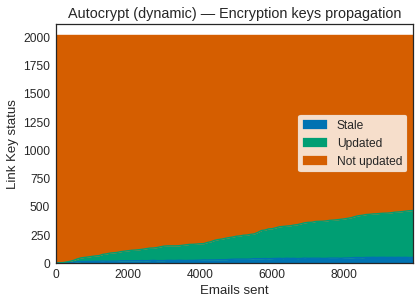

In [148]:
visualize_propagation('Autocrypt (dynamic)', dyn_ac_hp)
plt.show()

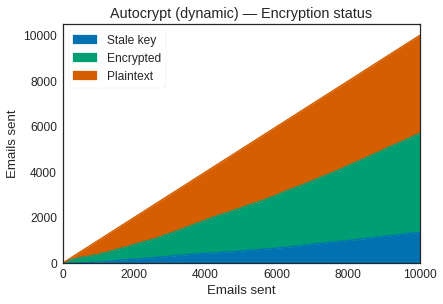

In [186]:
visualize_encryption_status_history('Autocrypt (dynamic)', dyn_ac_es)
plt.show()

In [150]:
static_params = SimulationParams(key_update_every_nb_sent_emails=None, chain_update_buffer_size=5)
dynamic_params = SimulationParams(key_update_every_nb_sent_emails=50, chain_update_buffer_size=5)

In [193]:
with static_params.as_default():
    cc_pub_kp, cc_pub_hp, cc_pub_es = simulate_claimchain_no_privacy(context)

Simulating the ClaimChain with public claims:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=None)
Keys:   Updated: 595, Not updated: 1606, Stale: 0
Heads:  Updated: 541, Not updated: 1606, Stale: 54
Emails: Sent: 6222, Encrypted: 459


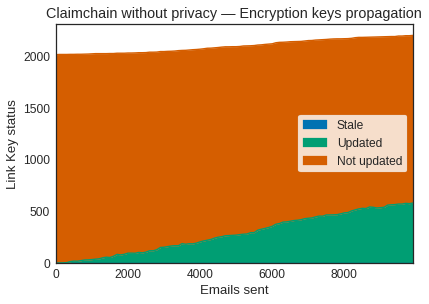

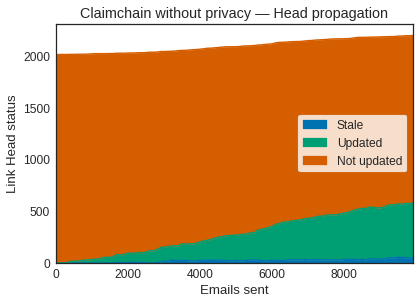

In [194]:
visualize_propagation('Claimchain without privacy', cc_pub_kp, cc_pub_hp)
plt.show()

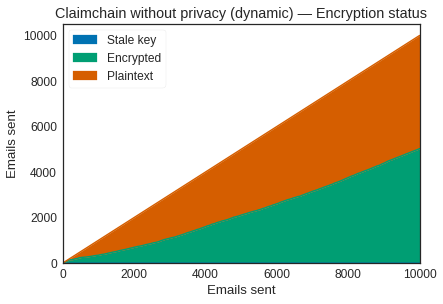

In [195]:
visualize_encryption_status_history('Claimchain without privacy (dynamic)', cc_pub_es)
plt.show()

In [196]:
with static_params.as_default():
    cc_priv_kp, cc_priv_hp, cc_priv_es = simulate_claimchain_with_privacy(context)

Simulating ClaimChain with private claims and introductions:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=None)
Keys:   Updated: 571, Not updated: 1768, Stale: 0
Heads:  Updated: 531, Not updated: 1768, Stale: 40
Emails: Sent: 6222, Encrypted: 1026


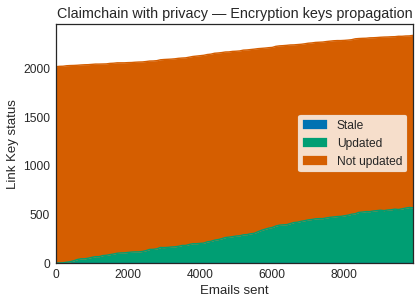

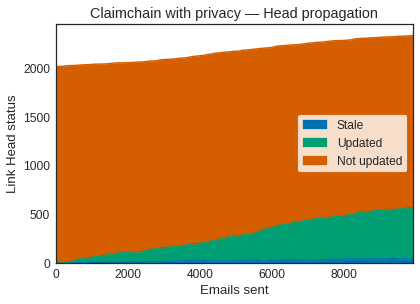

In [197]:
visualize_propagation('Claimchain with privacy', cc_priv_kp, cc_priv_hp)

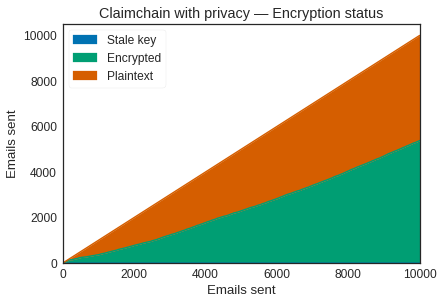

In [200]:
visualize_encryption_status_history('Claimchain with privacy', cc_priv_es)
plt.show()

In [201]:
with dynamic_params.as_default():
    dyn_cc_priv_kp, dyn_cc_priv_hp, dyn_cc_priv_es = simulate_claimchain_with_privacy(context)

Simulating ClaimChain with private claims and introductions:
SimulationParams(mode='dummy', chain_update_buffer_size=5, key_update_every_nb_sent_emails=50)
Keys:   Updated: 522, Not updated: 1765, Stale: 52
Heads:  Updated: 511, Not updated: 1765, Stale: 63
Emails: Sent: 6222, Encrypted: 1028


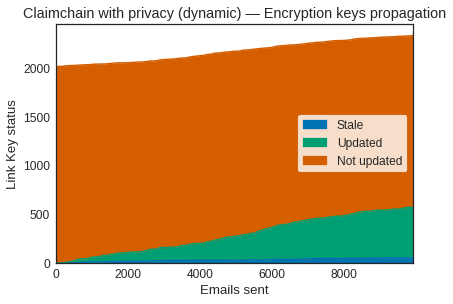

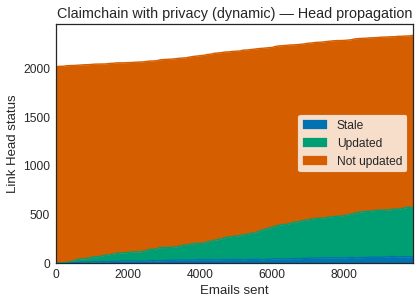

In [202]:
visualize_propagation('Claimchain with privacy (dynamic)', dyn_cc_priv_kp, dyn_cc_priv_hp)

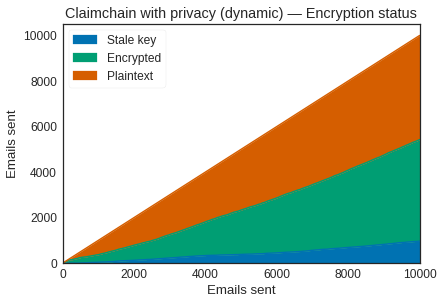

In [203]:
visualize_encryption_status_history('Claimchain with privacy (dynamic)', dyn_cc_priv_es)
plt.show()